In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_circles

# Generate circle data set
X, y = make_circles(
    n_samples=200, shuffle=True, noise=0.3, random_state=0, factor=0.3)

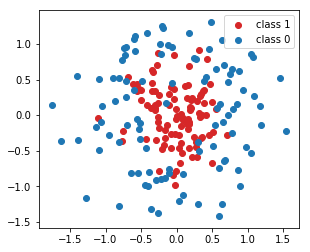

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Same scale for x- and y-axis
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

# Plot data
class1_idx = (y == 1)
ax.scatter(X[:, 0][class1_idx], X[:, 1][class1_idx], c='C3', label='class 1')
ax.scatter(X[:, 0][~class1_idx], X[:, 1][~class1_idx], c='C0', label='class 0')
ax.legend()
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create a decision tree
dt = RandomForestClassifier(
    n_estimators=1, max_depth=5, random_state=0)

# Fit estimator
dt.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [8]:
# Helper function
def decision_surface(ax, x1, x2, y, estimator):
    # Same scale for x- and y-axis
    ax.set_aspect('equal', adjustable='box')

    # Plot data points
    class1_idx = (y == 1)
    plt.scatter(x1[class1_idx], x2[class1_idx], color='C3', label='class 1')
    plt.scatter(x1[~class1_idx], x2[~class1_idx], color='C0', label='class 0')

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    plt.contour(xx, yy, zz, levels=[0.5], colors='gray')

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, alpha=0.1, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.show()

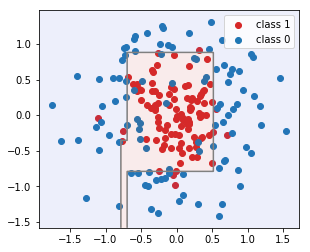

In [9]:
# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, dt)

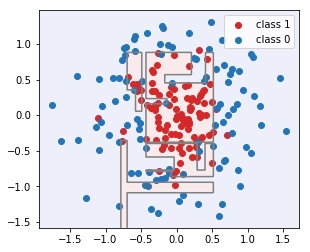

In [10]:
# Create a (deep) decision tree
dt_max_depth = RandomForestClassifier(
    n_estimators=1, max_depth=None, random_state=0)

# Fit estimator
dt_max_depth.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, dt_max_depth)

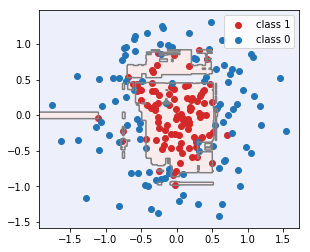

In [11]:
# Create random forest estimator
rf_10 = RandomForestClassifier(
    n_estimators=10, max_depth=None, random_state=0)

# Fit estimator
rf_10.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rf_10)

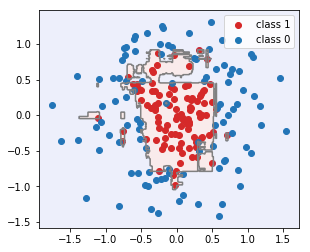

In [12]:
# Create a (large) random forest estimator
rf_200 = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=0)

# Fit estimator
rf_200.fit(X, y)

# Plot decision surface
fig, ax = plt.subplots()
decision_surface(ax, X[:, 0], X[:, 1], y, rf_200)

In [13]:
from sklearn.model_selection import cross_validate

# Mean test score of a single decision tree (max depth)
dt_scores = cross_validate(dt_max_depth, X, y, cv=10)
print('Decision tree - mean test {:.3f}'.format(
    np.mean(dt_scores['test_score'])))
# Prints: 0.780

# Mean test score of a random forest (200x, max depth)
rf_scores = cross_validate(rf_200, X, y, cv=10)
print('Random forest - mean test {:.3f}'.format(
    np.mean(rf_scores['test_score'])))
# Prints: 0.825

Decision tree - mean test 0.780
Random forest - mean test 0.825


In [15]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

# Create X/y arrays
X = iris['data']
y = iris['target']

In [16]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.preprocessing import OneHotEncoder

# create one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

y_tr_hot = encoder.fit_transform(y_tr.reshape(-1,1))
y_te_hot = encoder.transform(y_te.reshape(-1,1))

# integer encoded labels
print(y_tr[0]) # Prints: 1

# one-hot encoded labels
print(y_tr_hot[0]) # Prints: [0. 1. 0.]

1
[0. 1. 0.]


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Create the estimator
knn = KNeighborsClassifier(n_neighbors=2)

# Fit it to train data
knn.fit(X_tr, y_tr)

# output the classes
print(knn.classes_) # Prints: [0 1 2]

# Accuracy on test set
accuracy = knn.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy)) # Prints: 0.978

[0 1 2]
Accuracy: 0.978


In [19]:
# Create the estimator
knn = KNeighborsClassifier(n_neighbors=2)

# Fit it to train data (using one-hot encoded labels)
knn.fit(X_tr, y_tr_hot)

# output the classes
print(knn.classes_) # Prints: [array([0., 1.]), array([0., 1.]), array([0., 1.])]

# Accuracy on test set
accuracy = knn.score(X_te, y_te_hot)
print('Accuracy: {:.3f}'.format(accuracy)) # Prints: 0.956

[array([0., 1.]), array([0., 1.]), array([0., 1.])]
Accuracy: 0.956
